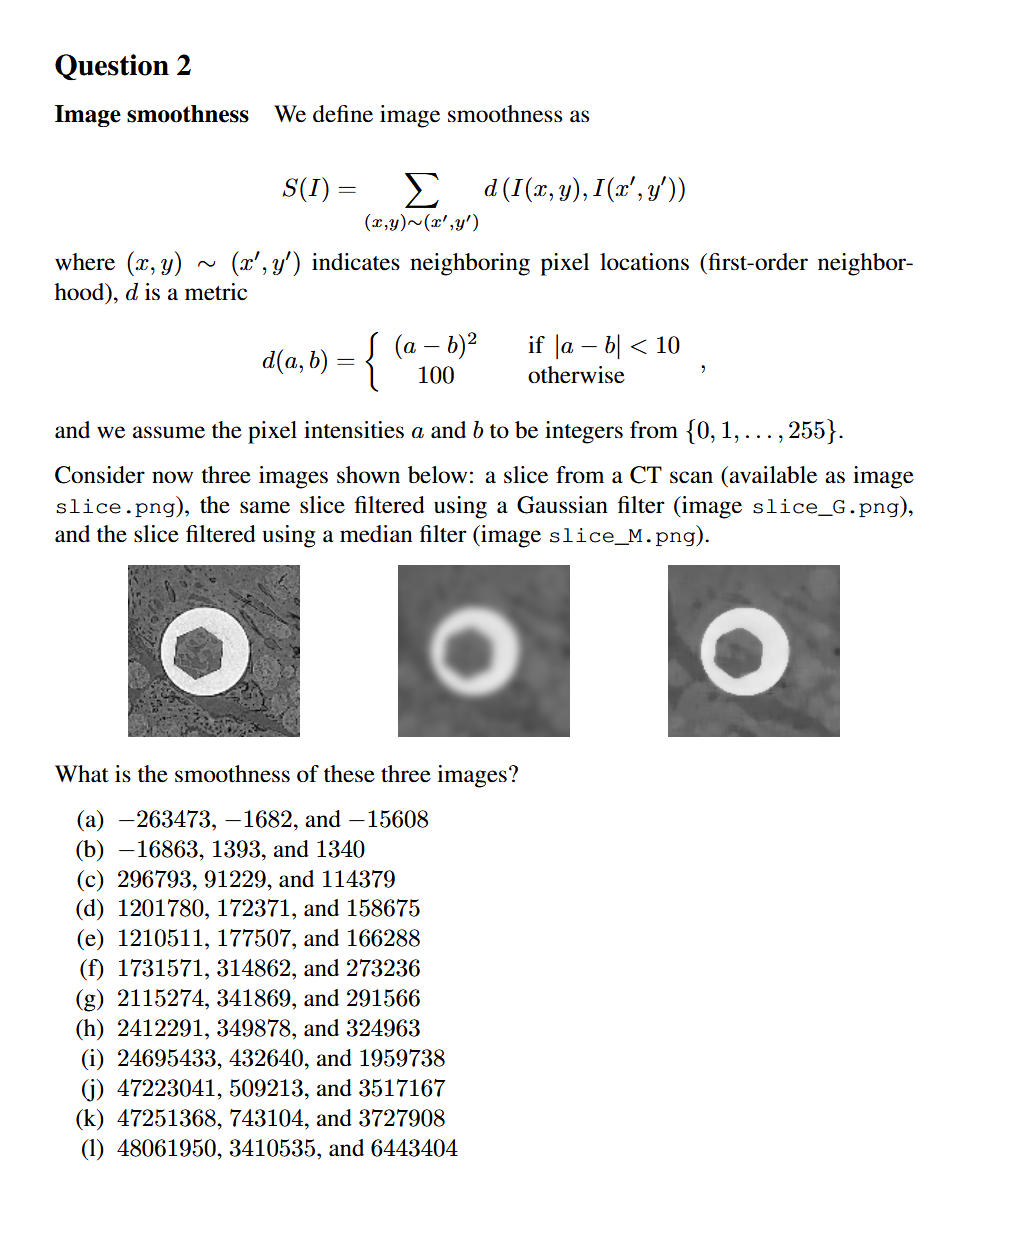

In [5]:
from skimage import io
import numpy as np

In [6]:
i_1 = io.imread('data/slice/slice.png', as_gray=True)
i_g = io.imread('data/slice/slice_G.png', as_gray=True)
i_m = io.imread('data/slice/slice_M.png', as_gray=True)


print("i_1.shape", i_1.shape)
print("i_g.shape", i_g.shape)
print("i_m.shape", i_m.shape)

# print pixel range 

print("i_1 min", i_1.min(), "max", i_1.max())
print("i_g min", i_g.min(), "max", i_g.max())
print("i_m min", i_m.min(), "max", i_m.max())


i_1.shape (120, 120)
i_g.shape (120, 120)
i_m.shape (120, 120)
i_1 min 0 max 255
i_g min 73 max 231
i_m min 60 max 237


In [7]:
def metric_d(image):
    # i calcualte the difference of rows as row_diff = np.abs(mapped_image[1:] - mapped_image[:-1])
    image = image.astype(np.float32)
    
    
    row_diff = (image[1:] - image[:-1])
    row_diffs_abs = np.abs(row_diff)
    row_distances = np.where(row_diffs_abs < 10, row_diff ** 2, 100)
    
    # same for columns 
    col_diff = image[:, 1:] - image[:, :-1]
    col_diffs_abs = np.abs(col_diff)
    col_distances = np.where(col_diffs_abs < 10, col_diff ** 2, 100)

    return np.sum(row_distances) + np.sum(col_distances)


In [8]:
smoothness_of_i_1 = metric_d(i_1)
smoothness_of_i_g = metric_d(i_g)
smoothness_of_i_m = metric_d(i_m)



print(f'Smoothness of i_1: {smoothness_of_i_1}')
print(f'Smoothness of i_g: {smoothness_of_i_g}')
print(f'Smoothness of i_m: {smoothness_of_i_m}')


Smoothness of i_1: 2115274.0
Smoothness of i_g: 341869.0
Smoothness of i_m: 291566.0
